<a href="https://colab.research.google.com/github/YasabnehT/Pharmaceutical-Sales-Prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploration of customer purchasing behavior


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

# from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib as mpl
# import os
from datetime import datetime

# from download import download

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False




In [2]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [10]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

### Utility Functions

In [9]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 3), "%", "missing values.")


# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# fill missing numeric values with mean and object type values with mode
def fill_missing_values(df):
  for column in df.columns:
    if df[column].dtype == 'float64':
      df[column] = df[column].fillna(df[column].interpolate(axis = 1))
    elif df[column].dtypes == 'object':
      df[column] = df[column].fillna(df[column].mode()[0])
  return df


def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d')

In [10]:
!pip install dvc[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 5.3 MB/s 
     |████████████████████████████████| 109 kB 49.3 MB/s 
     |████████████████████████████████| 41 kB 560 kB/s 
     |████████████████████████████████| 40 kB 6.5 MB/s 
     |████████████████████████████████| 44 kB 3.1 MB/s 
     |████████████████████████████████| 235 kB 55.2 MB/s 
     |████████████████████████████████| 281 kB 51.4 MB/s 
     |████████████████████████████████| 134 kB 58.4 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 61 kB 7.1 MB/s 
     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 594 kB 52.7 MB/s 
     |████████████████████████████████| 346 kB 48.3 MB/s 
     |████████████████████████████████| 495 kB 46.9 MB/s 
     |████████████████████████████████| 181 kB 45.4 MB/s 
     |████████████████████████████████| 4.5 

In [7]:
!sudo apt install git-all

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  apache2 apache2-bin apache2-data apache2-utils cvs cvsps emacs emacs25
  emacs25-bin-common emacs25-common emacs25-el emacsen-common
  fonts-droid-fallback fonts-noto-mono ghostscript git-cvs git-daemon-run
  git-doc git-el git-email git-gui git-mediawiki git-svn gitk gitweb gsfonts
  imagemagick-6-common install-info libalgorithm-c3-perl libapr1 libaprutil1
  libaprutil1-dbd-sqlite3 libaprutil1-ldap libauthen-sasl-perl
  libb-hooks-endofscope-perl libb-hooks-op-check-perl libcgi-fast-perl
  libcgi-pm-perl libclass-c3-perl libclass-c3-xs-perl
  libclass-data-inheritable-perl libclass-factory-util-perl
  libclass-inspector-perl libclass-method-modifiers-perl
  libclass-singleton-perl libcommon-sense-p

In [8]:
import git, dvc

### Datasets

In [66]:
# df_tm = pd.read_csv('/content/drive/MyDrive/Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)


test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/week 3/data/test.csv", 
                      parse_dates= ['Date'], na_values=["undefined","?",None])
store_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/week 3/data/store.csv",
                          na_values=["undefined","?",None])
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week 3/data/train.csv',
                         parse_dates= ['Date'], na_values=['undefined','?', None])

In [109]:
# !git init remote https://github.com/YasabnehT/Pharmaceutical-Sales-Prediction
!git init

Reinitialized existing Git repository in /content/.git/


In [110]:
!dvc init -f

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [113]:
# !dvc remote add -f -d Pharmaceutical-Sales-Prediction https://github.com/YasabnehT/Pharmaceutical-Sales-Prediction
!dvc add '/content/drive/MyDrive/Colab Notebooks/week 3/data/train.csv'

⠹ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Transferring:   0% 0/1 [00:00<?, ?file/s]
Transferring:   0% 0/1 [00:00<?, ?file/s{'info': ''}]

!

  0%|          |train.csv                          0.00/? [00:00<?,        ?B/s]

train.csv:   0% 0.00/36.3M [00:00<?, ?B/s{'info': ''}]                          

train.csv:  30% 11.0M/36.3M [00:00<00:00, 112MB/s{'info': ''}]

                                                              
Transferring: 100% 1/1 [00:00<00:00,  4.98file/s{'info': ''}]
                                                             
!
  0%|          |.ZgUgTY9CS3xJacfbSMeZiH.tmp        0.00/? [00:00<?,        ?B/s]
.ZgUgTY9CS3xJacfbSMeZiH.tmp:   0% 0.00/4.00 [00:00<?, ?B/s{'info': ''}]         
                                                                       
!
  0%|          |7aedd9e2d580e06a6ef7ce1732e8b6     0.00/? [00:00<?,        ?B/s]
7aedd9e2

In [102]:
!dvc add --file '/content/drive/MyDrive/Colab Notebooks/week 3/data/train.csv'

ERROR: the following arguments are required: targets
usage: dvc add [-h] [-q | -v] [-R] [--no-commit] [--external] [--glob]
               [--file <filename>] [-o <path>] [--to-remote] [-r <name>]
               [-j <number>] [--desc <text>]
               targets [targets ...]

Track data files or directories with DVC.
Documentation: <https://man.dvc.org/add>

positional arguments:
  targets               Input files/directories to add.

optional arguments:
  -h, --help            show this help message and exit
  -q, --quiet           Be quiet.
  -v, --verbose         Be verbose.
  -R, --recursive       Recursively add files under directory targets.
  --no-commit           Don't put files/directories into cache.
  --external            Allow targets that are outside of the DVC repository.
  --glob                Allows targets containing shell-style wildcards.
  --file <filename>     Specify name of the .dvc file this command will
                        generate.
  -o <path>, --out 

In [57]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [58]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [71]:
train_data['Year'] = train_data['Date'].apply(lambda x: x.year)
train_data['month'] = train_data['Date'].apply(lambda x: x.month)
train_data['day'] = train_data['Date'].apply(lambda x: x.day)


train_indexed = train_data.set_index('Date')
test_indexed = test_data.set_index('Date')

In [72]:
train_indexed

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,month,day
Date,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1,2013,1,1
2013-01-01,1112,2,0,0,0,0,a,1,2013,1,1
2013-01-01,1113,2,0,0,0,0,a,1,2013,1,1


In [75]:
# train_data.loc['2015-07-31':'2015-07-10']

In [79]:
sales_train = train_indexed['Sales']
sales_train.index.year.unique()

Int64Index([2015, 2014, 2013], dtype='int64', name='Date')

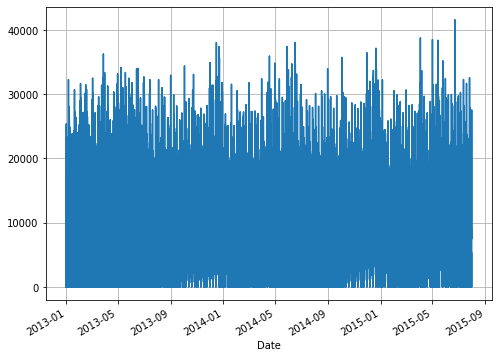

In [80]:
sales_train.plot(grid = True)

### Samples

### Null Values

In [ ]:
percent_missing(train_data)

The dataset contains 0.0 % missing values.


In [ ]:
percent_missing(test_data)

The dataset contains 0.004 % missing values.


In [ ]:
missing_values_table(test_data)

Your selected dataframe has 7 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Open,11,0.03,float64


In [ ]:
percent_missing(store_data)

The dataset contains 21.013 % missing values.


In [ ]:
missing_values_table(store_data)

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.79,float64
Promo2SinceYear,544,48.79,float64
PromoInterval,544,48.79,object
CompetitionOpenSinceMonth,354,31.75,float64
CompetitionOpenSinceYear,354,31.75,float64
CompetitionDistance,3,0.27,float64


#### This implies the **training** data has **no null** values while 'open' feature of test dataset has **0.004%** null values. **Store** dataset has **21.013%** null values to be managed.

#### The missed data values are numeric types
* We can use interpolation while working with time-series data because in time-series data we like to fill missing values with previous one or two values.
* It can be used to estimate unknown data points between two known data points.

* Since we are considering the time-series nature of the sales data, we choose to use interpolation here.

In [ ]:
test_data.interpolate(inplace = True)

In [ ]:
percent_missing(test_data)

The dataset contains 0.0 % missing values.


In [ ]:
store_data.interpolate( method="linear", inplace = True)

In [ ]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                1
Promo2SinceYear                1
PromoInterval                544
dtype: int64

In [ ]:
missing_values_table(store_data)

Your selected dataframe has 10 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Dtype
PromoInterval,544,48.79,object
Promo2SinceWeek,1,0.09,float64
Promo2SinceYear,1,0.09,float64
